# AdaBoost Method

**Importing the Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

**Importing the Data and Visualize it**

In [2]:
data = pd.read_csv("mushrooms.csv")
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


**Attribute Information**

cap-shape:                bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
bruises?:                 bruises=t,no=f
odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
gill-attachment:          attached=a,descending=d,free=f,notched=n
gill-spacing:             close=c,crowded=w,distant=d
gill-size:                broad=b,narrow=n
gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
stalk-shape:              enlarging=e,tapering=t
stalk-root:               bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
veil-type:                partial=p,universal=u
veil-color:               brown=n,orange=o,white=w,yellow=y
ring-number:              none=n,one=o,two=t
ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
population:               abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
habitat:                  grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

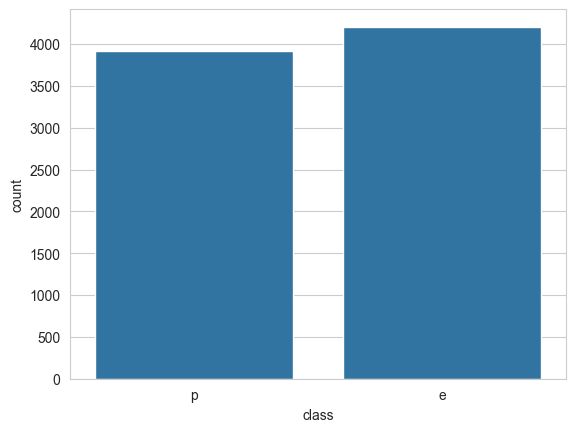

In [3]:
plt.figure(dpi=100)
sns.countplot(data=data, x="class");

In [4]:
data.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [5]:
unique_feat = data.describe().transpose().reset_index().sort_values("unique")

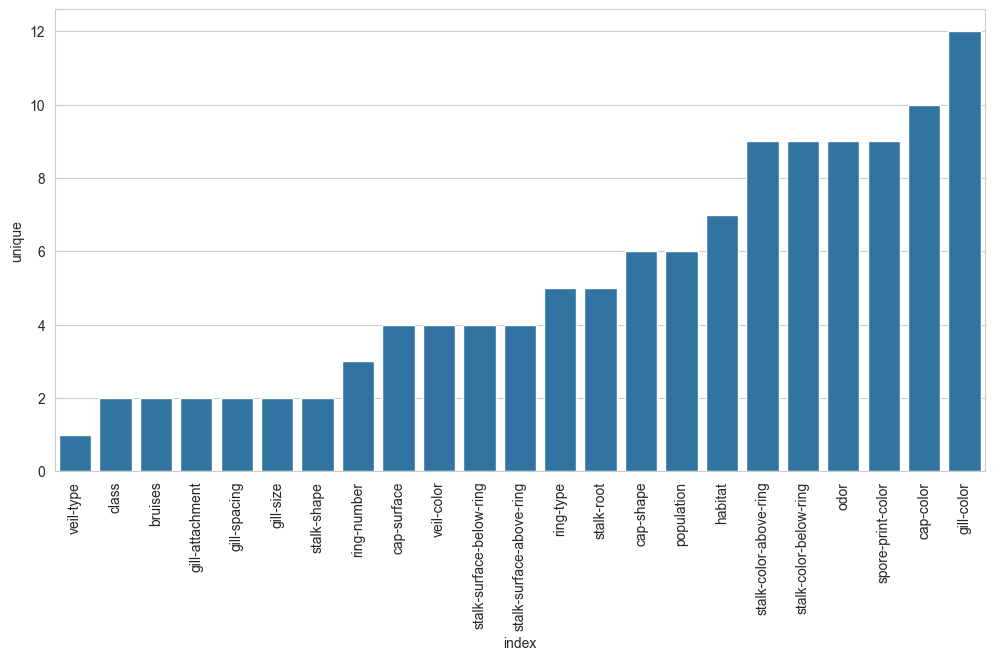

In [6]:
plt.figure(figsize=(12, 6), dpi=100)
sns.barplot(data=unique_feat, x="index", y="unique")
plt.xticks(rotation=90);

**Splitting the data into the Independent and Dependent Features and also convert into the Dummies Features**  

In [7]:
x = data.drop(columns="class")
x = pd.get_dummies(x, drop_first=True)
y = data["class"]

**Splitting the Data into the Training and Testing Data**

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=16)

**Implementing the AdaBoost Method with Decision Tree**

In [9]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

**Evaluating the Performance Matrix and Checking the Important Feature**

In [10]:
from sklearn.metrics import confusion_matrix, classification_report
print("Classification Report -\n", classification_report(y_test, y_pred))
print("Confusion Matrix -\n", confusion_matrix(y_test, y_pred))

Classification Report -
               precision    recall  f1-score   support

           e       0.97      0.80      0.88       853
           p       0.82      0.97      0.89       772

    accuracy                           0.88      1625
   macro avg       0.89      0.89      0.88      1625
weighted avg       0.90      0.88      0.88      1625

Confusion Matrix -
 [[685 168]
 [ 24 748]]


In [11]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
model.feature_importances_.argmax()

22

In [13]:
x.columns[22]

'odor_n'

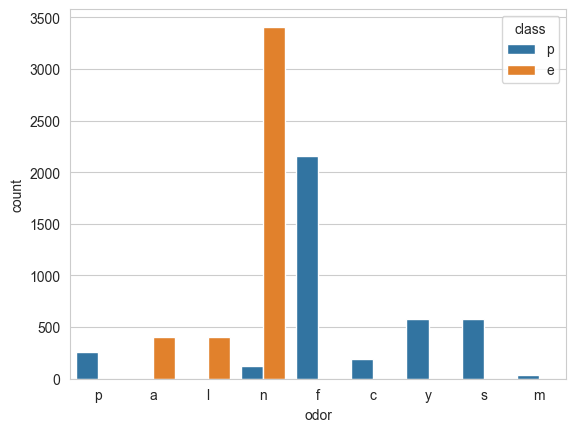

In [14]:
plt.figure(dpi=100)
sns.countplot(data=data, x="odor", hue="class");

**Checking the estimators with 1-96**

In [15]:
from sklearn.metrics import accuracy_score
error_rates = []

for n in range(1, 96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    error_rates.append(1-accuracy_score(y_test, y_pred))

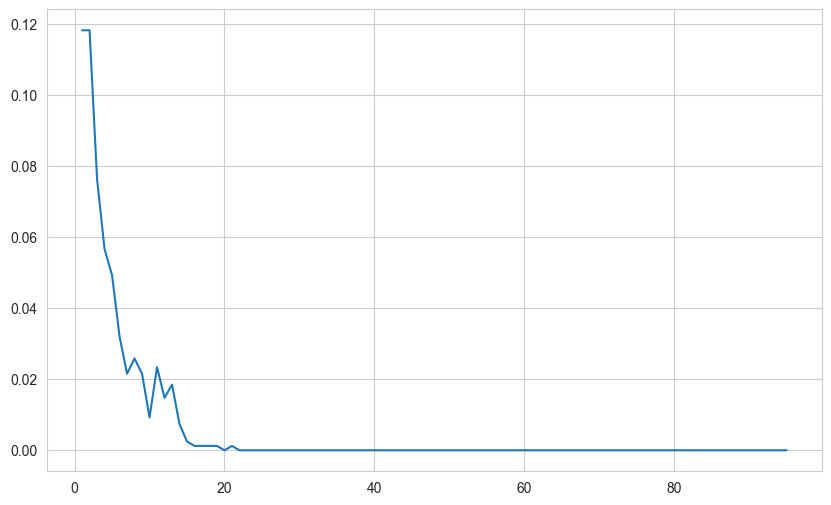

In [16]:
plt.figure(figsize=(10, 6),dpi=100)
plt.plot(range(1, 96), error_rates);

**Creating the Model with Estimator with 20 and Evaluating the Performance Matrix and Checking the Important Features**

In [17]:
model = AdaBoostClassifier(n_estimators=20)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [18]:
print("Classification Report -\n", classification_report(y_test, y_pred))
print("Confusion Matrix -\n", confusion_matrix(y_test, y_pred))

Classification Report -
               precision    recall  f1-score   support

           e       1.00      1.00      1.00       853
           p       1.00      1.00      1.00       772

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix -
 [[853   0]
 [  0 772]]


In [19]:
features = pd.DataFrame(data=model.feature_importances_, index=x.columns, columns=["Importance"])
imp_features = features[features["Importance"]>0]

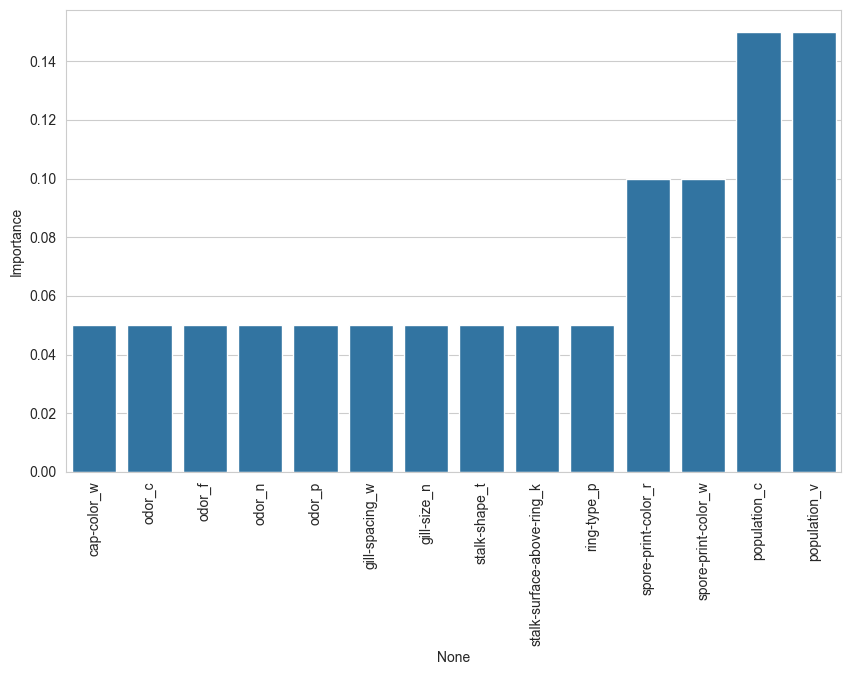

In [20]:
plt.figure(figsize=(10, 6),dpi=100)
sns.barplot(data=imp_features.sort_values("Importance"), x=imp_features.index, y="Importance")
plt.xticks(rotation=90);